# Reconnaissance de lettres

## Import des modules & données

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import tensorflow as tf
from keras.utils import *
from keras import Sequential
from keras.layers import *
from keras.models import *
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

from sklearn.metrics import classification_report,confusion_matrix

import seaborn as sns

import matplotlib.pyplot as plt 

In [2]:
training_letter = pd.read_csv('data/emnist-letters-train.csv', header=None, prefix="col_")
training_letter.rename(columns = {'col_0':'label'}, inplace = True)

testing_letter = pd.read_csv('data/emnist-letters-test.csv', header=None, prefix="col_")
testing_letter.rename(columns = {'col_0':'label'}, inplace = True)

training_letter.head()

label  col_1  col_2  col_3  col_4  col_5  col_6  col_7  col_8  col_9  ...  \
0     23      0      0      0      0      0      0      0      0      0  ...   
1      7      0      0      0      0      0      0      0      0      0  ...   
2     16      0      0      0      0      0      0      0      0      0  ...   
3     15      0      0      0      0      0      0      0      0      0  ...   
4     23      0      0      0      0      0      0      0      0      0  ...   

   col_775  col_776  col_777  col_778  col_779  col_780  col_781  col_782  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   col_783  col_784  
0        0        0  
1        0        0  
2        0        0  
3        0        0  
4        0        0  

[5 rows x 785 columns]

In [3]:
testing_letter.head()

label  col_1  col_2  col_3  col_4  col_5  col_6  col_7  col_8  col_9  ...  \
0      1      0      0      0      0      0      0      0      0      0  ...   
1      1      0      0      0      0      0      0      0      0      0  ...   
2      1      0      0      0      0      0      0      0      0      0  ...   
3      1      0      0      0      0      0      0      0      0      0  ...   
4      1      0      0      0      0      0      0      0      0      0  ...   

   col_775  col_776  col_777  col_778  col_779  col_780  col_781  col_782  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   col_783  col_784  
0        0        0  
1        0        0  
2        0        0  
3        0        0  
4        0        0  

[5 rows x 785 columns]

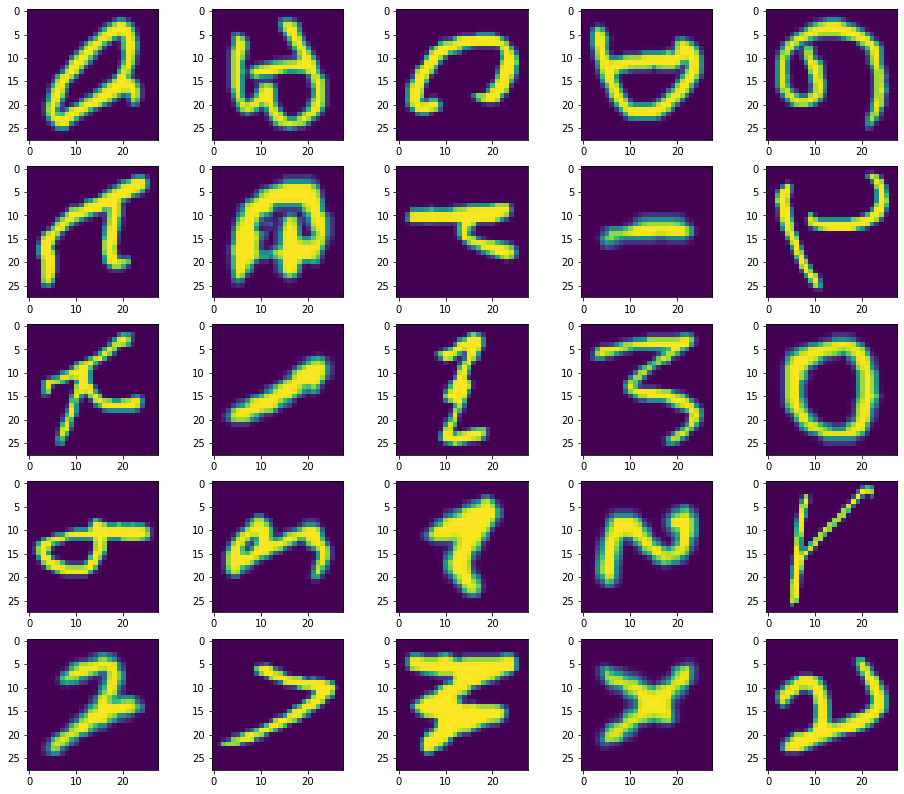

In [4]:
df_unique = training_letter.groupby('label').first()

xx = np.array(df_unique.values)

fig,axes = plt.subplots(5,5,figsize=(16,14))
for i,ax in enumerate(axes.flat):
    ax.imshow(xx[i].reshape([28,28]))

In [5]:
dictionnaire = dict({0:"???",
                     1:"a",
                     2:"b",
                     3:"c",
                     4:"d",
                    5:"e",
                    6:"f",
                    7:"g",
                    8:"h",
                    9:"i",
                    10:"j",
                    11:"k",
                    12:"l",
                    13:"m",
                    14:"n",
                    15:"o",
                    16:"p",
                    17:"q",
                    18:"r",
                    19:"s",
                    20:"t",
                    21:"u",
                    22:"v",
                    23:"w",
                    24:"x",
                    25:"y",
                    26:"z"})

training_letter.label.unique()

array([23,  7, 16, 15, 17, 13, 11, 22, 24, 10, 14, 18, 21, 26, 19,  5,  2,
       25,  9, 12,  1,  8,  4,  3, 20,  6], dtype=int64)

## Exploration

In [6]:
print(len(training_letter["label"].unique()))
training_letter["label"].value_counts()

26


25    3453
11    3438
24    3437
5     3437
20    3436
17    3435
16    3430
9     3428
26    3427
8     3424
23    3423
22    3422
3     3419
21    3419
18    3419
12    3415
15    3408
13    3402
10    3402
4     3398
2     3396
1     3396
6     3394
19    3392
7     3385
14    3365
Name: label, dtype: int64

In [7]:
print(len(testing_letter["label"].unique()))
testing_letter["label"].value_counts()

19


15    800
3     800
16    800
1     800
9     800
17    800
2     800
10    800
18    800
11    800
7     800
4     800
12    800
5     800
13    800
6     800
14    800
8     800
19    400
Name: label, dtype: int64

In [8]:
training_letter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88800 entries, 0 to 88799
Columns: 785 entries, label to col_784
dtypes: int64(785)
memory usage: 531.8 MB


In [9]:
testing_letter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14800 entries, 0 to 14799
Columns: 785 entries, label to col_784
dtypes: int64(785)
memory usage: 88.6 MB


## Pre processing

(88800,)
(88800, 784)


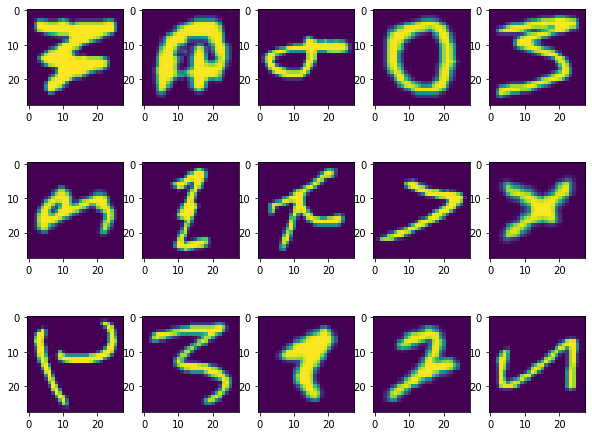

In [10]:
#training_letters
y1 = np.array(training_letter.iloc[:,0].values)
x1 = np.array(training_letter.iloc[:,1:].values)
#testing_labels
y2 = np.array(testing_letter.iloc[:,0].values)
x2 = np.array(testing_letter.iloc[:,1:].values)
print(y1.shape)
print(x1.shape)

fig,axes = plt.subplots(3,5,figsize=(10,8))
for i,ax in enumerate(axes.flat):
    ax.imshow(x1[i].reshape([28,28]))

In [11]:
# Normalise and reshape data
train_images = x1 / 255.0
test_images = x2 / 255.0

train_images_number = train_images.shape[0]
train_images_height = 28
train_images_width = 28
train_images_size = train_images_height*train_images_width

train_images = train_images.reshape(train_images_number, train_images_height, train_images_width, 1)

test_images_number = test_images.shape[0]
test_images_height = 28
test_images_width = 28
test_images_size = test_images_height*test_images_width

test_images = test_images.reshape(test_images_number, test_images_height, test_images_width, 1)

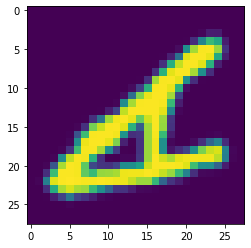

In [12]:
plt.imshow(test_images[1].reshape([28,28]))

In [13]:
number_of_classes = len(training_letter["label"].unique())+1

y1 = to_categorical(y1, number_of_classes)
y2 = to_categorical(y2, number_of_classes)

NameError: name 'to_categorical' is not defined

## Modélisation

### Modèle 1

In [ ]:
MCP = ModelCheckpoint('Best_points_2.h5',verbose=1,save_best_only=True,monitor='val_accuracy',mode='max')
ES = EarlyStopping(monitor='val_accuracy',min_delta=0,verbose=1,restore_best_weights = True,patience=3,mode='max')
RLP = ReduceLROnPlateau(monitor='val_loss',patience=3,factor=0.2,min_lr=0.0001)

train_x, test_x, train_y, test_y = train_test_split(train_images, y1, test_size=0.2, random_state=42)

model = Sequential([Conv2D(32,3,input_shape=(28,28,1)),
                            MaxPooling2D(2,2),
                            Flatten(input_shape=(28,28,1)),
                            Dense(512,activation='relu'),
                            Dense(128,activation='relu'),
                            Dense(number_of_classes,activation='softmax')])

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()

In [ ]:
history = model.fit(train_x,train_y,epochs=2,batch_size=128,validation_data=(test_x,test_y), verbose=1,callbacks=[MCP,ES,RLP])

In [ ]:
q = len(history.history['accuracy'])

plt.figsize=(10,10)
sns.lineplot(x = range(1,1+q),y = history.history['accuracy'], label='Accuracy')
sns.lineplot(x = range(1,1+q),y = history.history['val_accuracy'], label='Val_Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuray')

In [ ]:
q = len(history.history['loss'])

plt.figsize=(10,10)
sns.lineplot(x = range(1,1+q),y = history.history['loss'], label='loss')
sns.lineplot(x = range(1,1+q),y = history.history['val_loss'], label='Val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')

In [ ]:
predictions = model.predict(test_x).round()
predictions

In [ ]:
print(classification_report(test_y, predictions))

### Modèle 2

In [ ]:
model2 = Sequential([Conv2D(32,3,input_shape=(28,28,1)),
                            MaxPooling2D(2,2),
                            Flatten(input_shape=(28,28,1)),
                            Dense(256,activation='relu'),
                            Dense(128,activation='relu'),
                            Dense(number_of_classes,activation='softmax')])

model2.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

model2.summary()

In [ ]:
history1 = model2.fit(train_x,train_y,epochs=2,batch_size=136,validation_data=(test_x,test_y))

In [ ]:
q = len(history1.history['accuracy'])

plt.figsize=(10,10)
sns.lineplot(x = range(1,1+q),y = history1.history['accuracy'], label='Accuracy')
sns.lineplot(x = range(1,1+q),y = history1.history['val_accuracy'], label='Val_Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')

In [ ]:
q = len(history1.history['loss'])

plt.figsize=(10,10)
sns.lineplot(x = range(1,1+q),y = history1.history['loss'], label='loss')
sns.lineplot(x = range(1,1+q),y = history1.history['val_loss'], label='Val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')

In [ ]:
predictions2 = model2.predict(test_x)
predictions2 = predictions2.round()
predictions2

In [ ]:
print(classification_report(test_y, predictions2))

In [ ]:
pd.DataFrame(index=[
                              'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'], columns=[
                              1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26])

In [ ]:
predictions3 = model2.predict(test_x)
predictions3 = predictions3
np.argmax(predictions3, axis=1)

In [3]:
model_ld = load_model('fat_model.hdf5')
model_ld.load_weights('Best_points.h5')

In [5]:
from PIL import Image

# Open the image form working directory

image = Image.open('Sans titre.png')
image = image.resize((28,28))
image = image.convert('L')


image_test = (tf.keras.utils.img_to_array(image,)/255)
image_test = image_test.reshape(1,28,28,1)

x = tf.convert_to_tensor(image_test)

predictions4 = model_ld.predict(x)
np.argmax(predictions4, axis=1)

array([18], dtype=int64)

In [10]:
predictions4.round(2)[0]

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.02, 0.02,
       0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.78, 0.  , 0.13, 0.  ,
       0.01, 0.  , 0.  , 0.02, 0.  ], dtype=float32)

In [27]:
dictionnaire

{0: '???',
 1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z'}